# PA KELOMPOK 1 KECERDASAN BUATAN

### NAMA ANGGOTA KELOMPOK : 
### - Hadie Pratama Tulili
### - Rafi Izdihar
### - Muhammad Firdaus

# 1.Tujuan

1. Untuk mengaplikasikan Convolutional Neural Networks (CNN) untuk memprediksi gambar anime atau kartun.

2. Untuk mengklasifikasikan suatu gambar ke salah satu dari 2 kategori : 
    **Anime, Cartoon**
    
3. Jumlah data training yang digunakan sebesar 7114 sampel, jumlah data testing sebesar 888 sampel serta jumlah data validation sebesar 1778 sampel.

In [456]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [457]:
# directory list
main_path = './anime-vs-cartoon-dataset/'

In [458]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    validation_split = 0.2)

train_set = train_datagen.flow_from_directory(main_path,
                                                subset = 'training',
                                                batch_size=32,
                                                target_size=(150, 150),
                                                class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255,
                                validation_split = 0.2)

val_set = val_datagen.flow_from_directory(main_path,
                                            batch_size=32,
                                            subset = 'validation',
                                            target_size=(150, 150),
                                            class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255,
                                 validation_split = 0.1)

test_set = test_datagen.flow_from_directory(main_path,
                                                subset = 'validation',
                                                batch_size=32,
                                                target_size=(150, 150),
                                                class_mode='categorical')

Found 7114 images belonging to 2 classes.
Found 1778 images belonging to 2 classes.
Found 888 images belonging to 2 classes.


In [459]:
# class names
class_names = ['Anime', 'Cartoon']
class_names

['Anime', 'Cartoon']

# Visualisasi

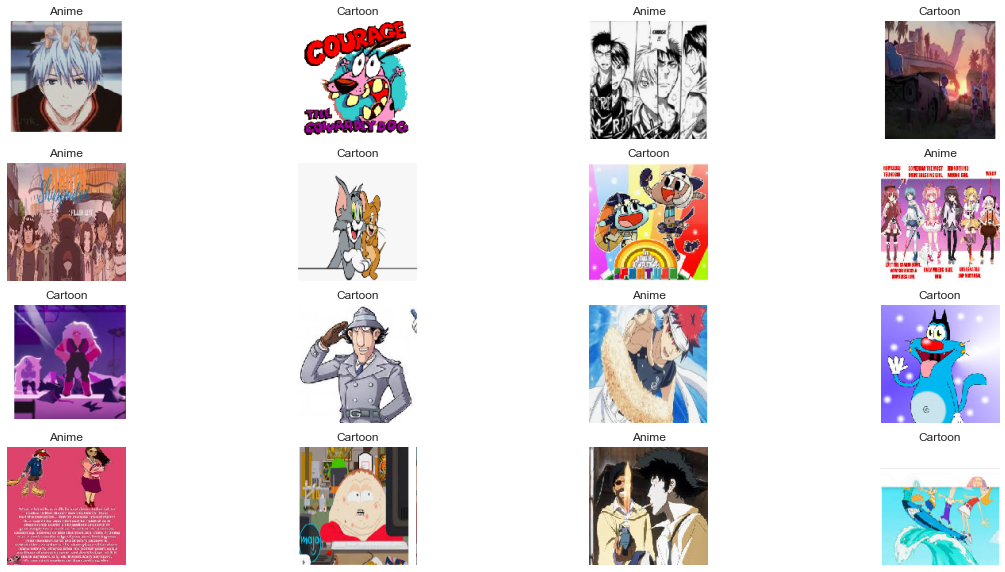

In [461]:
# data visualization
plt.figure(figsize=(20, 10))
images, labels = train_set.next()

for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[tf.argmax(labels[i])])
    plt.axis("off")

plt.show()

# Meta Data

In [462]:
data_train = []
data_test = []
data_val = []

for i in range(len(train_set)) :
    x,y = train_set.next()
    for j in range(len(y)) :
        data_train.append(class_names[tf.argmax(y[j])])

for i in range(len(test_set)) :
    x,y = test_set.next()
    for j in range(len(y)) :
        data_test.append(class_names[tf.argmax(y[j])])
        
for i in range(len(val_set)) :
    x,y = val_set.next()
    for j in range(len(y)) :
        data_val.append(class_names[tf.argmax(y[j])])

banyak_data = len(data_train) + len(data_test) + len(data_val)

print("Nama Dataset      : Anime-VS-Cartoon-Dataset")
print("Ukuran Gambar     : [150, 150, 3]")
print("Kelas             :",class_names)
print("Banyak Data       :",banyak_data)
print("Banyak Data Train :",len(data_train))
print("Banyak Data Test  :",len(data_test))
print("Banyak Data val   :",len(data_val))

Nama Dataset      : Anime-VS-Cartoon-Dataset
Ukuran Gambar     : [150, 150, 3]
Kelas             : ['Anime', 'Cartoon']
Banyak Data       : 9780
Banyak Data Train : 7114
Banyak Data Test  : 888
Banyak Data val   : 1778


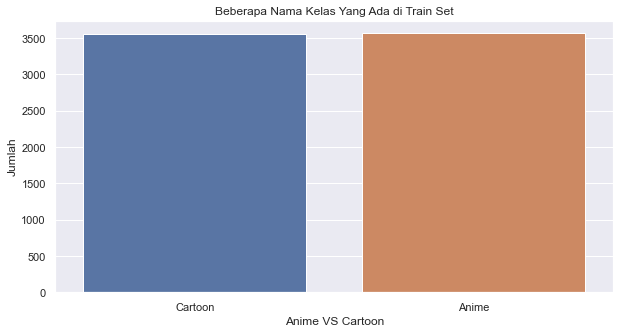

In [463]:
plt.figure(figsize=(10, 5))

sns.set_theme()

sns.countplot(x=data_train)
plt.xlabel('Anime VS Cartoon')
plt.ylabel('Jumlah')
plt.title('Beberapa Nama Kelas Yang Ada di Train Set')
plt.show()

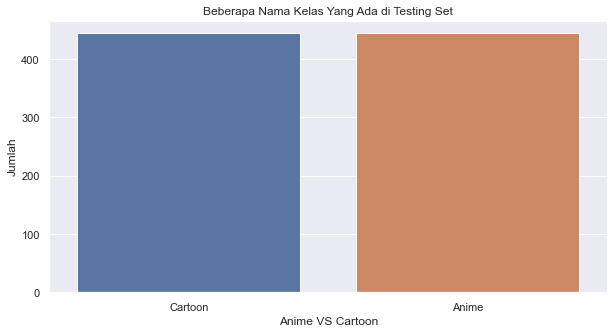

In [464]:
plt.figure(figsize=(10, 5))

sns.set_theme()


sns.countplot(x=data_test)
plt.xlabel('Anime VS Cartoon')
plt.ylabel('Jumlah')
plt.title('Beberapa Nama Kelas Yang Ada di Testing Set')
plt.show()

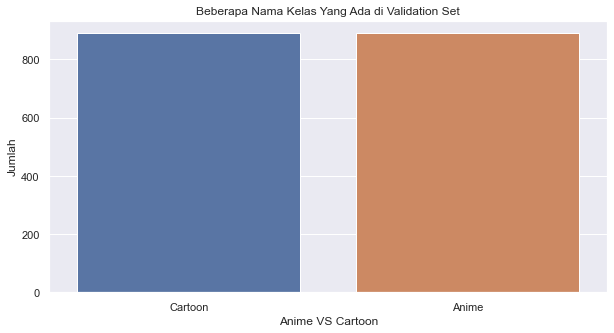

In [465]:
plt.figure(figsize=(10, 5))

sns.set_theme()


sns.countplot(x=data_val)
plt.xlabel('Anime VS Cartoon')
plt.ylabel('Jumlah')
plt.title('Beberapa Nama Kelas Yang Ada di Validation Set')
plt.show()

In [474]:
model = tf.keras.Sequential([

#Input layer
tf.keras.layers.Conv2D(64, (3,3), activation='relu',input_shape=[150, 150, 3]),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),

#Hidden layer
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
tf.keras.layers.Dropout(0.3),
tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),  
tf.keras.layers.Flatten(),
    
#Output layer
tf.keras.layers.Dense(2, activation='softmax')
])

In [475]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_88 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_88 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_89 (Conv2D)          (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_89 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 36, 36, 32)        0         
                                                                 
 conv2d_90 (Conv2D)          (None, 34, 34, 16)      

In [476]:
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=['accuracy'])

In [477]:
earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10,
)

In [479]:
hasil = model.fit(train_set, epochs=30, validation_data=val_set, verbose=1, callbacks=[earlyStopping])

Epoch 1/30
223/223 [==============================] - 176s 789ms/step - loss: 0.6673 - accuracy: 0.5776 - val_loss: 0.6432 - val_accuracy: 0.6142
Epoch 2/30
223/223 [==============================] - 169s 758ms/step - loss: 0.5666 - accuracy: 0.7190 - val_loss: 0.5289 - val_accuracy: 0.7632
Epoch 3/30
223/223 [==============================] - 168s 755ms/step - loss: 0.5251 - accuracy: 0.7560 - val_loss: 0.4950 - val_accuracy: 0.7610
Epoch 4/30
223/223 [==============================] - 174s 779ms/step - loss: 0.4965 - accuracy: 0.7696 - val_loss: 0.4416 - val_accuracy: 0.8071
Epoch 5/30
223/223 [==============================] - 165s 741ms/step - loss: 0.4724 - accuracy: 0.7792 - val_loss: 0.4421 - val_accuracy: 0.8065
Epoch 6/30
223/223 [==============================] - 171s 767ms/step - loss: 0.4572 - accuracy: 0.7910 - val_loss: 0.4409 - val_accuracy: 0.7947
Epoch 7/30
223/223 [==============================] - 167s 750ms/step - loss: 0.4372 - accuracy: 0.7996 - val_loss: 0.4041 -

In [480]:
test_evaluate = model.evaluate(test_set, verbose=0)
print(f'Test loss     : {test_evaluate[0]}')
print(f'Test accuracy : {test_evaluate[1]}')

Test loss     : 0.49807208776474
Test accuracy : 0.7961711883544922


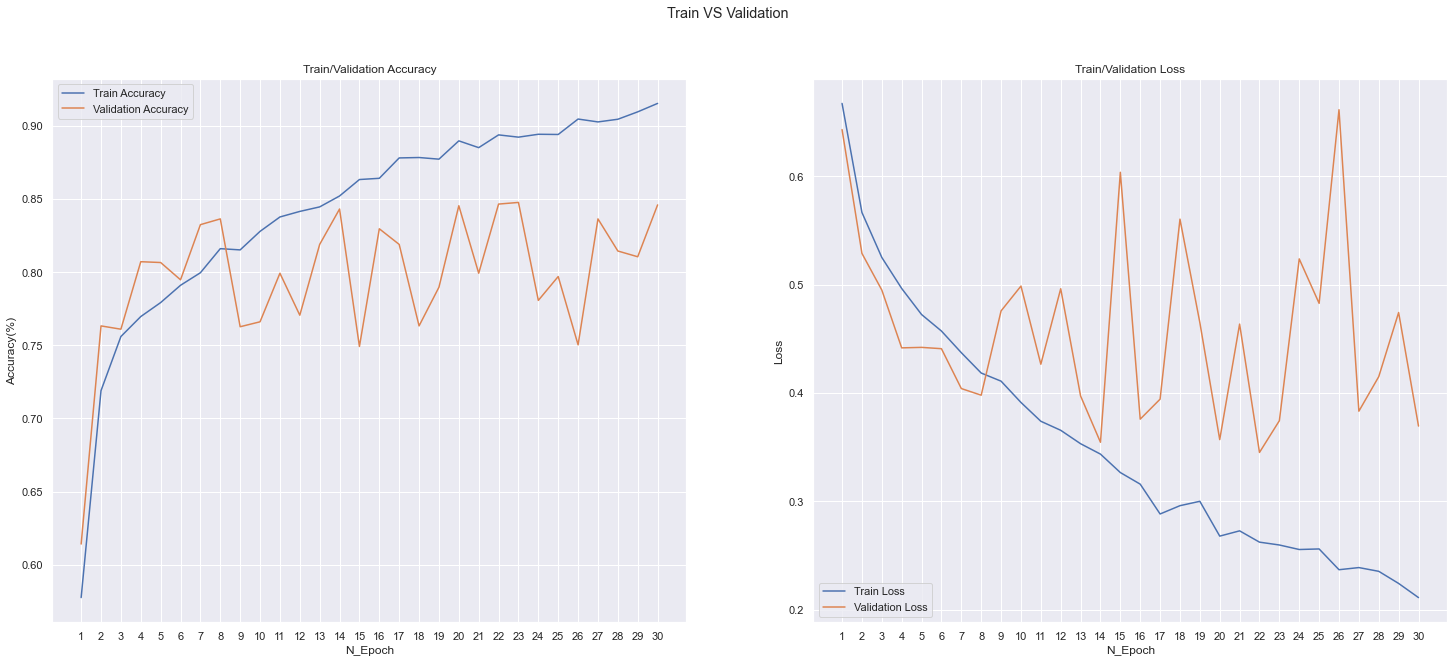

In [481]:
epoch = [i+1 for i in range(30)]


plt.figure(figsize=(25, 10))
plt.suptitle('Train VS Validation')

#Subplot Akurasi
plt.subplot(1,2,1)
sns.lineplot(x=epoch,y = hasil.history['accuracy'],label ='Train Accuracy')
sns.lineplot(x=epoch,y = hasil.history['val_accuracy'],label ='Validation Accuracy')

plt.xticks(epoch)
plt.ylabel('Accuracy(%)')
plt.xlabel('N_Epoch')
plt.title("Train/Validation Accuracy")

#Subplot Loss
plt.subplot(1,2,2)
sns.lineplot(x=epoch,y = hasil.history['loss'],label ='Train Loss')
sns.lineplot(x=epoch,y = hasil.history['val_loss'],label ='Validation Loss')

plt.xticks(epoch)
plt.title("Train/Validation Loss")
plt.xlabel('N_Epoch')
plt.ylabel('Loss')
plt.show()

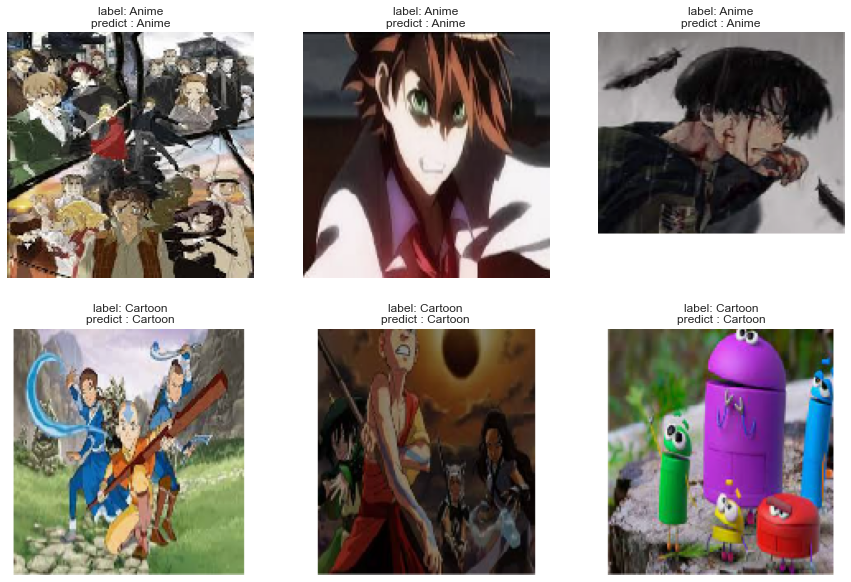

In [521]:
image ,label = next(iter(test_set))


plt.figure(figsize=(15,10))
for i in range(6) :
    TrueLabel = class_names[np.argmax(label[i])]
    plt.subplot(2,3,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'label: {TrueLabel}\npredict : {class_names[y_pred]}')

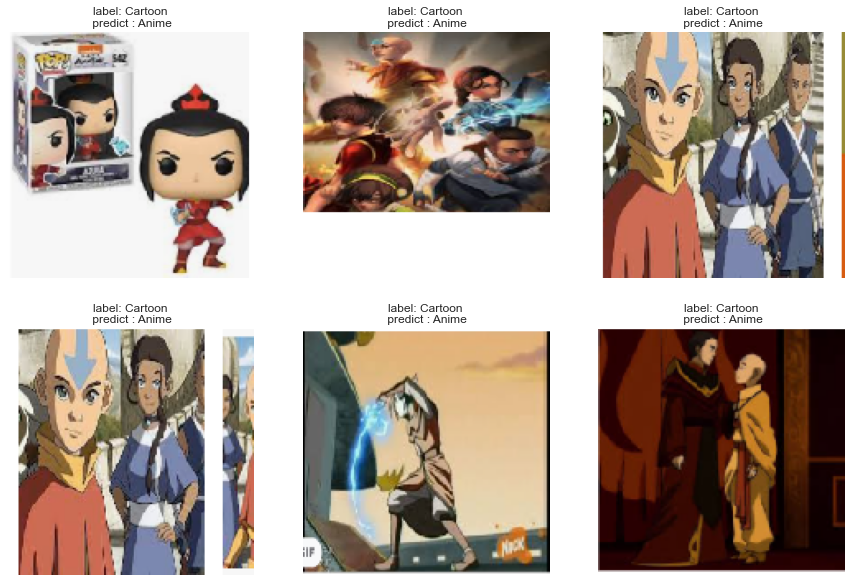

In [510]:
#Plot prediction Error
image ,label = next(iter(test_set))

plt.figure(figsize=(15,10))
i,j = 0,0
while (j < 6):
    TrueLabel = class_names[np.argmax(label[i])]
    plt.subplot(2,3,j+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    if (TrueLabel != class_names[y_pred]):
        plt.imshow(tf.squeeze(image[i]))
        plt.title(f'label: {TrueLabel}\n predict : {class_names[y_pred]}')
        j+=1
    i+=1

In [522]:
y_test = []
y_pred = []

for i in range(len(test_set)) :
    x,y = test_set.next()
    for j in range(len(y)) :
        y_test.append(class_names[tf.argmax(y[j])])
        y_pred.append(class_names[np.argmax(model.predict(x[j][None,...],verbose=0))])

print("Banyak data yang di tes      : ",len(y_test))
print("Banyak data yang di prediksi : ",len(y_pred)) 

Banyak data yang di tes      :  888
Banyak data yang di prediksi :  888


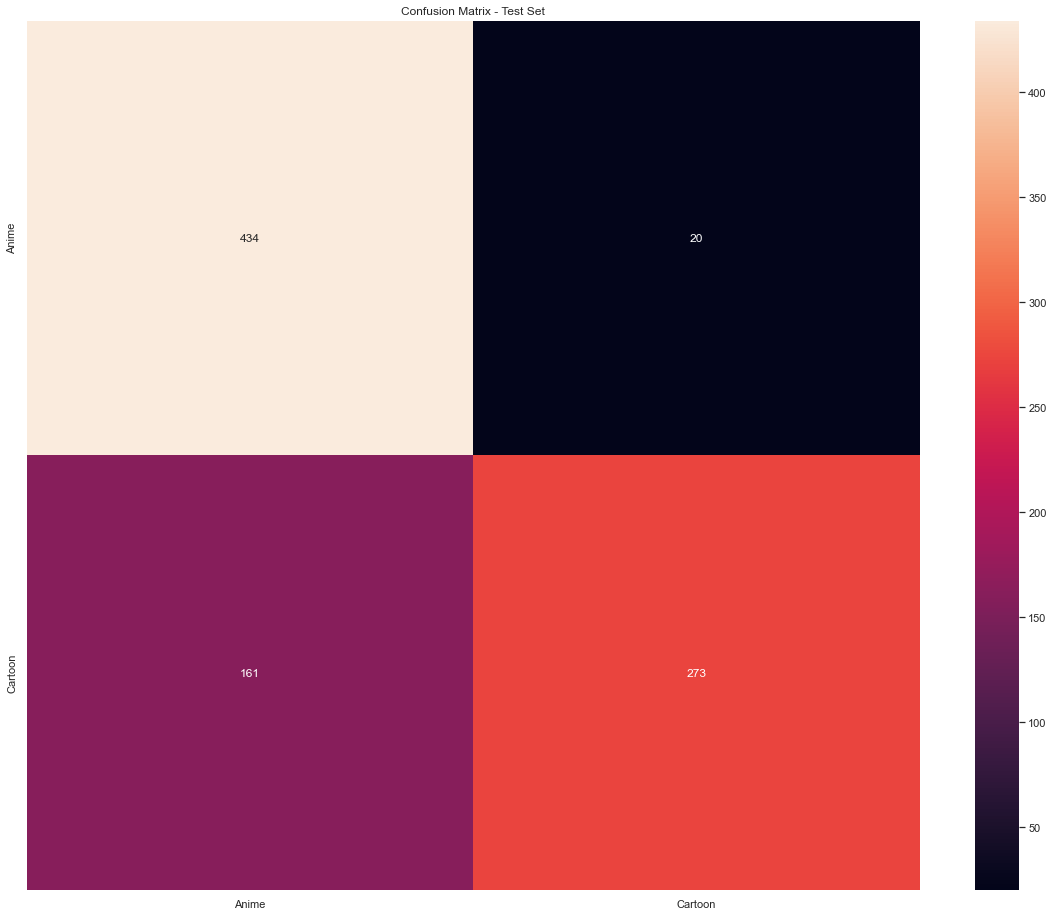

In [523]:
plt.figure(figsize=(20, 16))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_names,yticklabels=class_names)
plt.title("Confusion Matrix - Test Set")
plt.show()

In [528]:
#Classification Report
print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_names))

Classification Report
              precision    recall  f1-score   support

       Anime       0.73      0.96      0.83       454
     Cartoon       0.93      0.63      0.75       434

    accuracy                           0.80       888
   macro avg       0.83      0.79      0.79       888
weighted avg       0.83      0.80      0.79       888

